# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1

# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "amitranjan27"
kaggle_key = "c57238bcf9d641b01667bf97c79e6cba"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 91.2MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import autogluon.core as ag

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv",parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv",parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv",parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(label='count',
                            problem_type='regression',
                            eval_metric='root_mean_squared_error').fit(train_data = train.drop(['casual', 'registered'],axis=1),
                                                                       time_limit=600,
                                                                       presets='best_quality',
                                                                       ag_args_fit={'num_gpus': 1}
                                                          )

No path specified. Models will be saved in: "AutogluonModels/ag-20230525_180629/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230525_180629/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12042.6 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note

ValueError: ignored

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

In [ ]:
!pip freeze >> requirements.txt

In [ ]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
performance = predictor.evaluate(train)

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

In [ ]:
# How many negative values do we have?
predictions[predictions<0].sum()

In [ ]:
# Set them to zero
predictions[predictions<0]=0

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:01<00:00, 115kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-05-25 15:01:07  first raw submission               complete  1.79539      1.79539       
submission_new_hpo.csv       2023-05-25 10:48:01  new features with hyperparameters  complete  0.55684      0.55684       
submission_new_features.csv  2023-05-25 09:53:26  new features                       complete  0.64558      0.64558       
submission.csv               2023-05-25 09:42:06  first raw submission               complete  1.80206      1.80206       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(25,25))

In [ ]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour
train['hour_squared'] = train['hour'] ** 2
train['temp_humidity'] = train['temp'] * train['humidity']
test['hour_squared'] = test['hour'] ** 2
test['temp_humidity'] = test['temp'] * test['humidity']

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype(dtype='category')
train["weather"] = train["weather"].astype(dtype='category')
test["season"] = test["season"].astype(dtype='category')
test["weather"] = test["weather"].astype(dtype='category')

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,hour_squared,temp_humidity
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,0,797.04
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,721.60
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,4,721.60
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,9,738.00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,16,738.00


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'hour_squared'}>],
       [<Axes: title={'center': 'temp_humidity'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

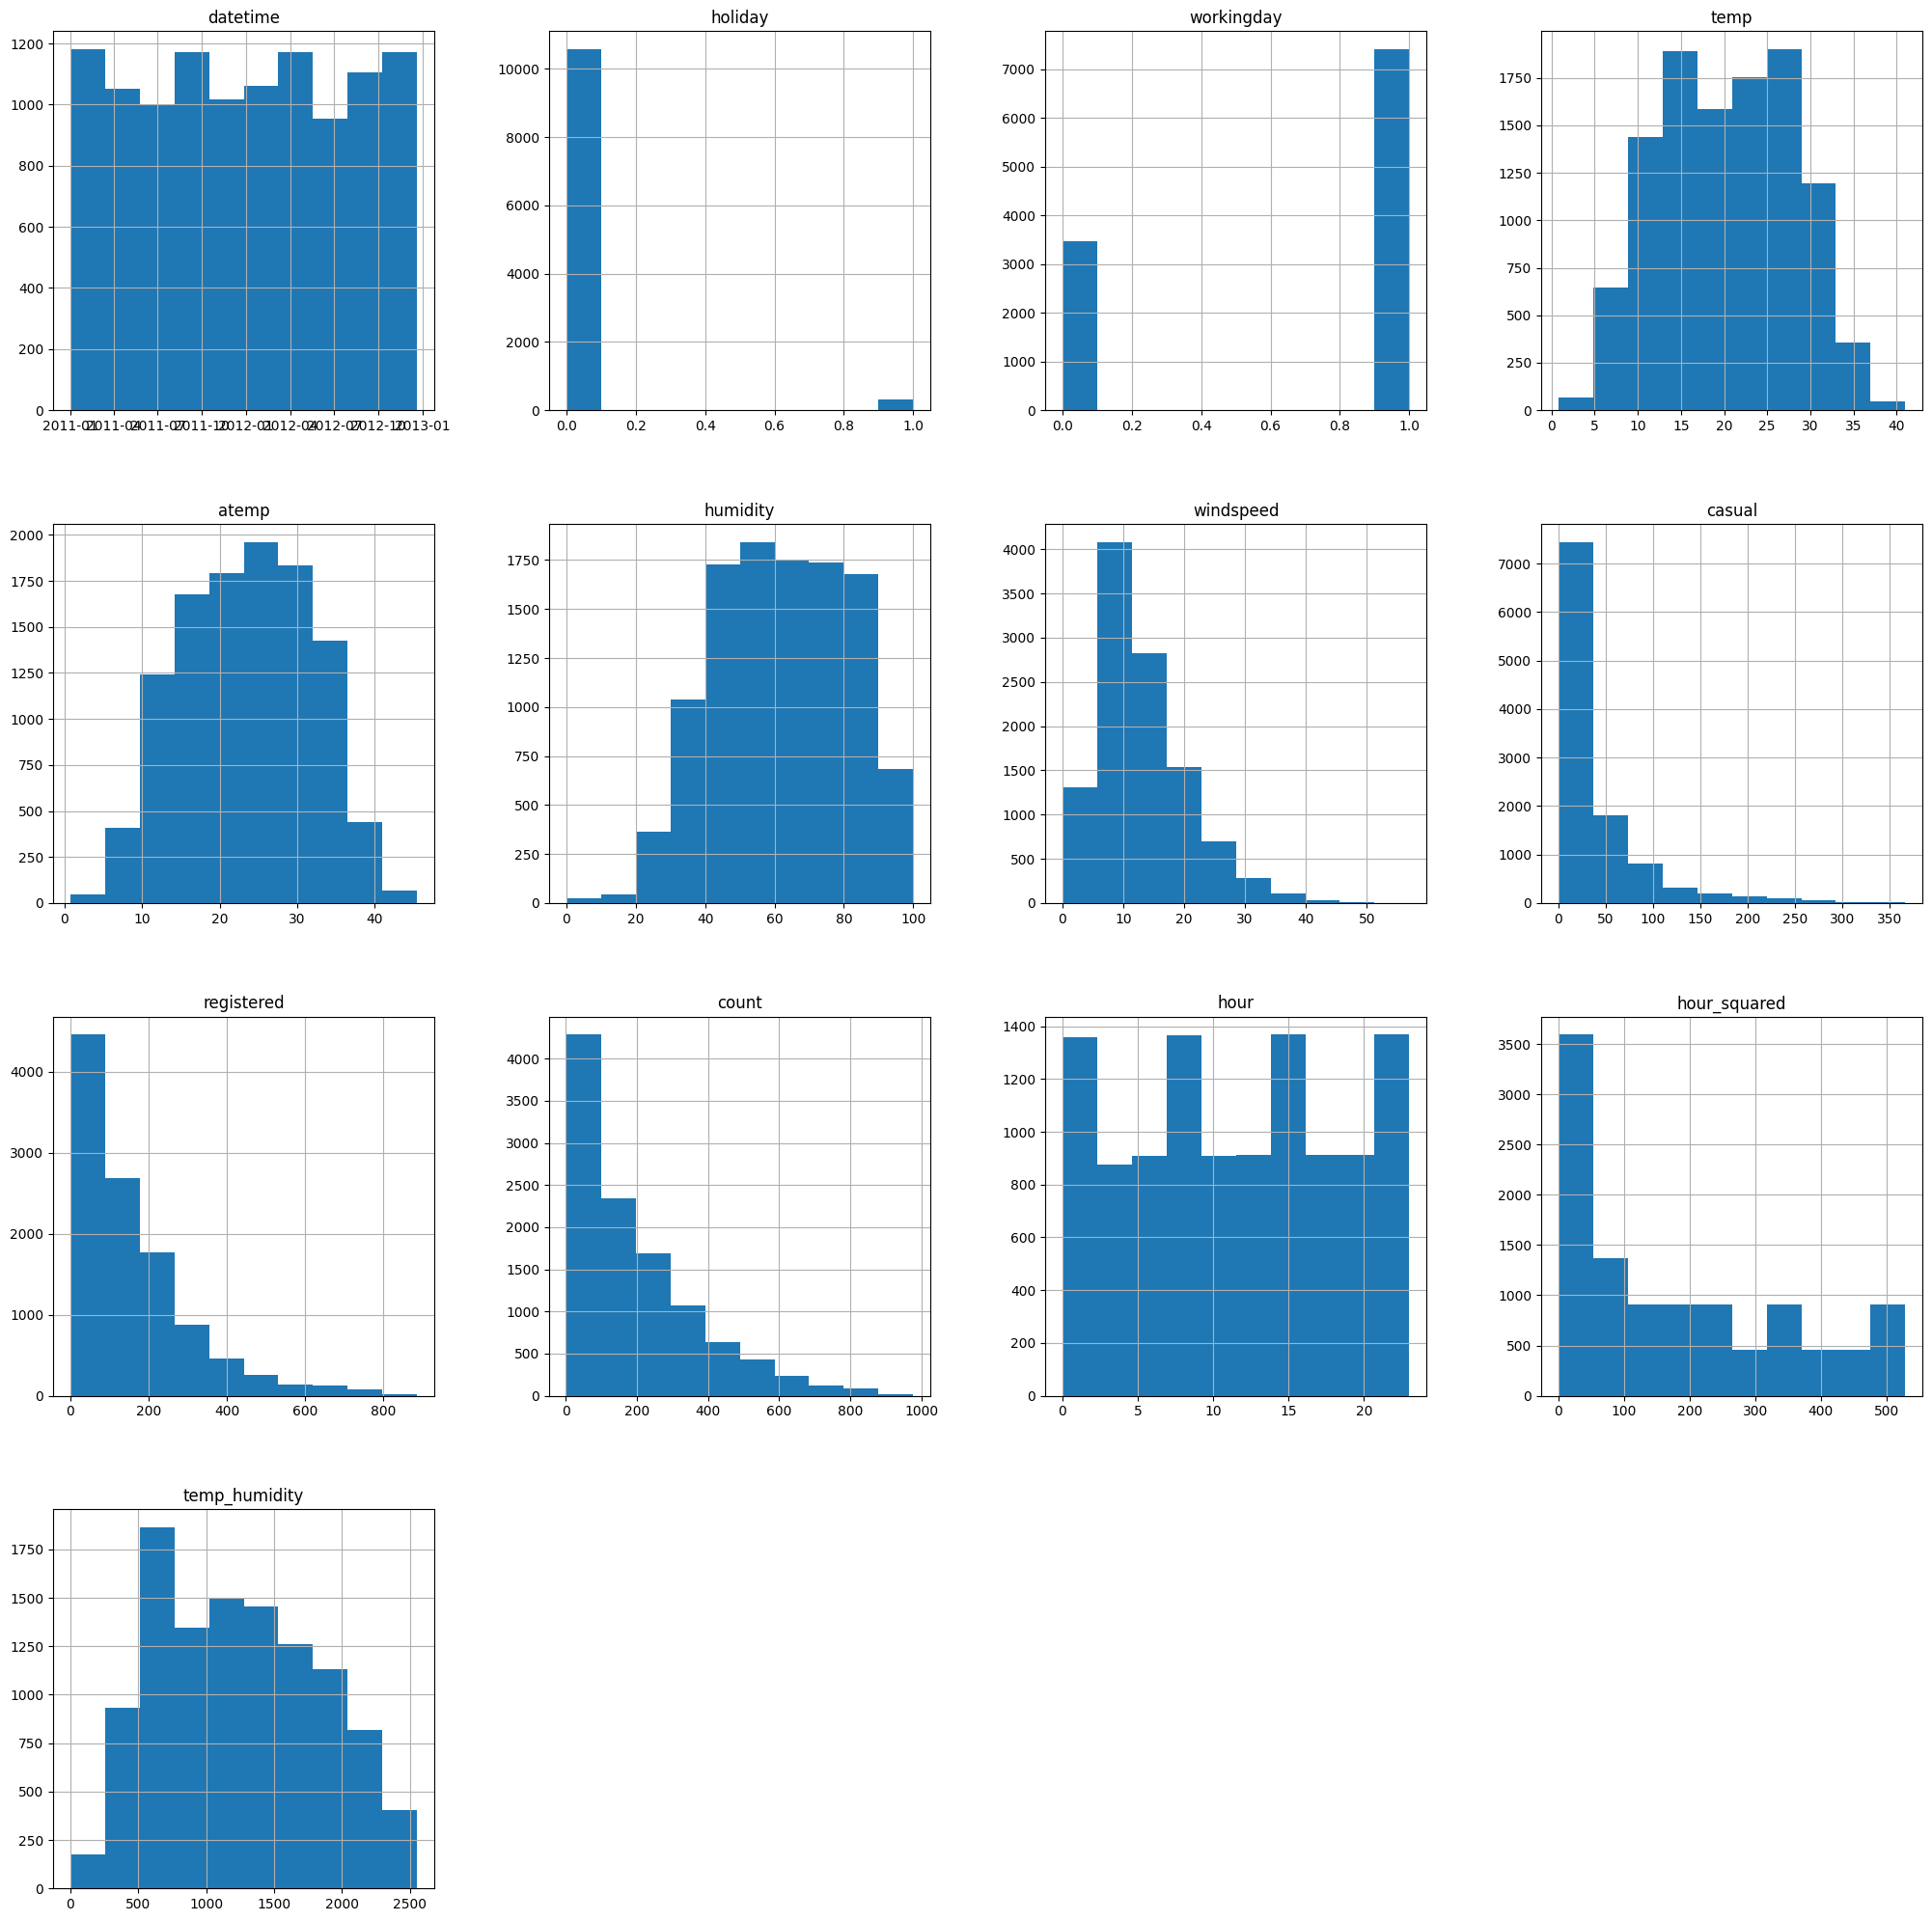

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(25,25))

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label='count',
                            problem_type='regression',
                            eval_metric='root_mean_squared_error').fit(train_data = train.drop(['casual', 'registered'],axis=1),
                                                                       time_limit=600,
                                                                       presets='best_quality',
                                                                       ag_args_fit={'num_gpus': 1}
                                                                      )

No path specified. Models will be saved in: "AutogluonModels/ag-20230525_150846/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230525_150846/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10755.55 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			No

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.432570      13.964805  615.241452                0.000749           0.188327            3       True         11
1          LightGBM_BAG_L2  -30.772100      12.311849  526.697579                0.204608          36.559905            2       True          9
2        LightGBMXT_BAG_L2  -31.000141      13.193541  537.184558                1.086300          47.046885            2       True          8
3   RandomForestMSE_BAG_L2  -31.928836      12.673148  531.446336                0.565907          41.308662            2       True         10
4      WeightedEnsemble_L2  -32.367502      12.039002  490.764523                0.000959           0.681551            2       True          7
5        LightGBMXT_BAG_L1  -34.165530       8.333587  124.712810         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.16553046530689,
  'LightGBM_BAG_L1': -34.250596295334894,
  'RandomForestMSE_BAG_L1': -38.53704066266535,
  'CatBoost_BAG_L1': -38.78080615926803,
  'WeightedEnsemble_L2': -32.36750161370886,
  'LightGBMXT_BAG_L2': -31.000140629681034,
  'LightGBM_BAG_L2': -30.772099

In [ ]:
predictions = predictor_new_features.predict(test)

In [ ]:
# Remember to set all negative values to zero
predictions[predictions<0].sum()
predictions[predictions<0]=0

In [ ]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:01<00:00, 154kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-25 15:20:19  new features                       complete  0.63080      0.63080       
submission.csv               2023-05-25 15:01:07  first raw submission               complete  1.79539      1.79539       
submission_new_hpo.csv       2023-05-25 10:48:01  new features with hyperparameters  complete  0.55684      0.55684       
submission_new_features.csv  2023-05-25 09:53:26  new features                       complete  0.64558      0.64558       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
import autogluon.core as ag

In [ ]:
hyperparamters = {
    'GBM': {
        'learning_rate': ag.space.Real(0.01, 0.1, default=0.05),
        'num_leaves': ag.space.Int(lower=20, upper=85, default=40),
        'boosting_type': ag.space.Categorical('rf','gbdt', 'dart', 'goss')
        
    }
}

In [ ]:
hyperparamters = {
    'RF': {
        'max_depth': ag.space.Int(lower=1, upper=20, default=0),
        'n_estimators': ag.space.Int(70, 500, default=150),
        'criterion': ag.space.Categorical('gini', 'entropy'),
        'min_samples_split': ag.space.Int(1, 15, default=5)
    }
}

In [ ]:
hyperparamters = {
    'NN_MXNET': {
        'num_epochs': 100,
        'learning_rate': ag.space.Real(0.0001, 0.1, default=0.05),
        'layers': ag.space.Categorical([50],[100], [200, 150], [250, 150, 50]),
        'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
        'dropout_prob': ag.space.Real(.1, .8, default=.4)
    }
}

In [ ]:
train.isna().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual           0
registered       0
count            0
hour             0
hour_squared     0
temp_humidity    0
dtype: int64

In [ ]:
train.isnull

<bound method DataFrame.isnull of                  datetime season  holiday  workingday weather   temp   atemp  \
0     2011-01-01 00:00:00      1        0           0       1   9.84  14.395   
1     2011-01-01 01:00:00      1        0           0       1   9.02  13.635   
2     2011-01-01 02:00:00      1        0           0       1   9.02  13.635   
3     2011-01-01 03:00:00      1        0           0       1   9.84  14.395   
4     2011-01-01 04:00:00      1        0           0       1   9.84  14.395   
...                   ...    ...      ...         ...     ...    ...     ...   
10881 2012-12-19 19:00:00      4        0           1       1  15.58  19.695   
10882 2012-12-19 20:00:00      4        0           1       1  14.76  17.425   
10883 2012-12-19 21:00:00      4        0           1       1  13.94  15.910   
10884 2012-12-19 22:00:00      4        0           1       1  13.94  17.425   
10885 2012-12-19 23:00:00      4        0           1       1  13.12  16.665   

     

In [ ]:
# import autogluon.core as ag

# nn_options = {  # specifies non-default hyperparameter values for neural network models
#     'num_epochs': 10,  # number of training epochs (controls training time of NN models)
#     'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
#     'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
#     'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  # each choice for categorical hyperparameter 'layers' corresponds to list of sizes for each NN layer to use
#     'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
# }

# gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
#     'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
#     'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
# }

# hyperparameters = {  # hyperparameters of each model type
#                    'GBM': gbm_options,
#                    'NN': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
#                   }  # When these keys are missing from hyperparameters dict, no models of that type are trained

# #num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
# search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler

# hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
#     #'num_trials': num_trials,
#     'scheduler' : 'local',
#     'searcher': search_strategy,
# }

# predictor_new_hpo = TabularPredictor(label="count", eval_metric="root_mean_squared_error",learner_kwargs={"ignored_columns":
# ["casual", "registered"]}).fit(train_data=train, time_limit=60, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
# )

No path specified. Models will be saved in: "AutogluonModels/ag-20230525_152021/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20230525_152021/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

**Ensemble Methods**

In [ ]:
ensemble_options = {
    'model': 'ensemble',
    'models_args': {
        'NN': {'num_epochs': 10, 'learning_rate': 5e-4},
        'RF': {'n_estimators': 200, 'max_depth': 10},
        'XGB': {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 5e-4}
    }
}


In [ ]:
# Define hyperparameters for different models and ensemble
ensemble_options = {
    'model': 'ensemble',
    'models_args': {
        'GBM': {'num_boost_round': 100, 'num_leaves': 36},
        'NN': {'num_epochs': 10, 'learning_rate': 5e-4},
        'RF': {'n_estimators': 200, 'max_depth': 10},
        'XGB': {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 5e-4}
    }
}

hyperparameters = {
    'GBM': {'num_boost_round': ag.space.Int(lower=50, upper=500, default=100),
            'num_leaves': ag.space.Int(lower=10, upper=100, default=36)},
    'NN': {'num_epochs': ag.space.Int(lower=5, upper=20, default=10),
           'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
           'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
           'layers': ag.space.Categorical([50], [100], [200, 100], [300, 200, 100]),
           'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1)},
    'RF': {'n_estimators': ag.space.Int(lower=100, upper=1000, default=200),
           'max_depth': ag.space.Int(lower=5, upper=20, default=10),
           'min_samples_leaf': ag.space.Int(lower=1, upper=10, default=1)},
    'XGB': {'n_estimators': ag.space.Int(lower=100, upper=1000, default=200),
            'max_depth': ag.space.Int(lower=5, upper=20, default=10),
            'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True)},
    'ensemble': ensemble_options  # Include the ensemble options
}

# Define hyperparameter tuning settings
hyperparameter_tune_kwargs = {
    'scheduler': 'local',
    'searcher': 'random',
    'num_trials': 10,
    'time_limits': 3600,
}



In [ ]:
# Fit the model with hyperparameter tuning
predictor = ag.TabularPredictor(label="count", eval_metric="root_mean_squared_error",
                                learner_kwargs={"ignored_columns": ["casual", "registered"]})

predictor_new_hpo=predictor.fit(train_data=train, hyperparameters=hyperparameters,
              hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

In [ ]:
predictor_new_hpo.fit_summary()

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   LightGBM_BAG_L2/T1 -38.540248       0.000247  56.702683                0.000116          28.694482            2       True          3
1  WeightedEnsemble_L3 -38.540248       0.005344  56.726696                0.005097           0.024013            3       True          4
2   LightGBM_BAG_L1/T1 -40.208907       0.000130  28.008201                0.000130          28.008201            1       True          1
3  WeightedEnsemble_L2 -40.208907       0.001176  28.018742                0.001046           0.010542            2       True          2
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_LGB', 'WeightedEnsembleModel'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  (with 3 levels)
Feature Metadata (Processed):
(raw dtype, special

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -40.20890687138266,
  'WeightedEnsemble_L2': -40.20890687138266,
  'LightGBM_BAG_L2/T1': -38.5402475080575,
  'WeightedEnsemble_L3': -38.5402475080575},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBM_BAG_L1/T1': '/content/AutogluonModels/ag-20230525_152021/models/LightGBM_BAG_L1/T1/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20230525_152021/models/WeightedEnsemble_L2/',
  'LightGBM_BAG_L2/T1': '/content/AutogluonModels/ag-20230525_152021/models/LightGBM_BAG_L2/T1/',
  'WeightedEnsemble_L3': 'AutogluonModels/ag-20230525_152021/models/WeightedEnsemble_L3/'},
 'model_fit_times': {'LightGBM_BAG_L1/T1': 28.008200645446777,
  'WeightedEnsemble_L2': 0.010541677474975586,
  'LightGBM_BAG_L2/T1': 28.6944823265075

In [ ]:
predictions = predictor_new_hpo.predict(test)

2023-05-25 15:21:43,084	ERROR worker.py:400 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.


In [ ]:
# Remember to set all negative values to zero
predictions[predictions<0].sum()

0.0

In [ ]:
submission_new_features = submission.copy()
submission_new_features["count"] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
# Same submitting predictions
submission_new_hpo =submission.copy()
submission_new_hpo["count"] = predictions
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:01<00:00, 114kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-25 15:21:48  new features with hyperparameters  complete  0.50901      0.50901       
submission_new_features.csv  2023-05-25 15:20:19  new features                       complete  0.63080      0.63080       
submission.csv               2023-05-25 15:01:07  first raw submission               complete  1.79539      1.79539       
submission_new_hpo.csv       2023-05-25 10:48:01  new features with hyperparameters  complete  0.55684      0.55684       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [?, ?, ?],
    "hpo2": [?, ?, ?],
    "hpo3": [?, ?, ?],
    "score": [?, ?, ?]
})